In [ ]:
pip install  neurokit2

#### Hands On 2 DSP
#### NIM: 122140012
#### Tanggal Lahir: 29 Februari 2004 (040229)

Soal 1 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftfreq
import neurokit2 as nk

In [14]:
# Parameter 
duration = 12  # 3 digit terakhir NIM (012)
fs_original = 150  # Sampling rate awal (Hz)
noise_level = 0.12  # 2 digit terakhir NIM (12)
heart_rate = 80  # BPM (Beat Per Minute)
random_state = 40229  # Format YYMMDD tanggal lahir

In [15]:
# Simulasi sinyal PPG
ppg_signal = nk.ppg_simulate(duration=duration, 
                            sampling_rate=fs_original,
                            heart_rate=heart_rate, 
                            drift=noise_level,
                            random_state=random_state)

# Waktu untuk plot original
t_original = np.linspace(0, duration, len(ppg_signal), endpoint=False)

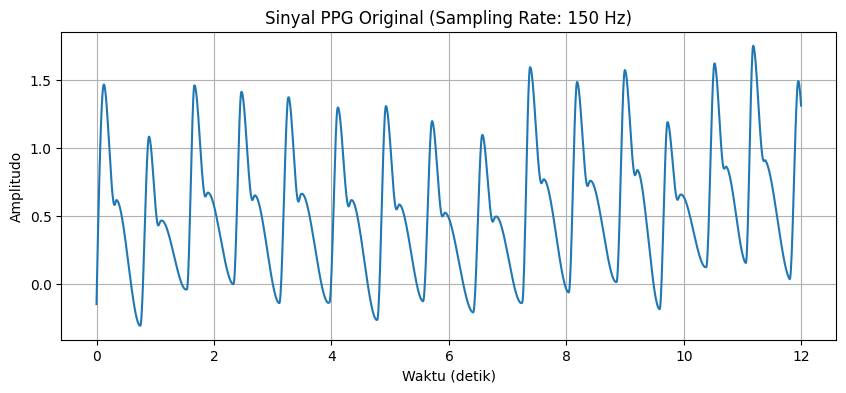

In [16]:
# Visualisasi sinyal PPG original
plt.figure(figsize=(10, 4))
plt.plot(t_original, ppg_signal)
plt.title("Sinyal PPG Original (Sampling Rate: {} Hz)".format(fs_original))
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.show()

In [17]:
# List sampling rate yang akan diuji
sampling_rates = [100, 50, 25, 10, 5]

In [18]:
# Untuk menyimpan sinyal hasil downsampling
downsampled_signals = {}

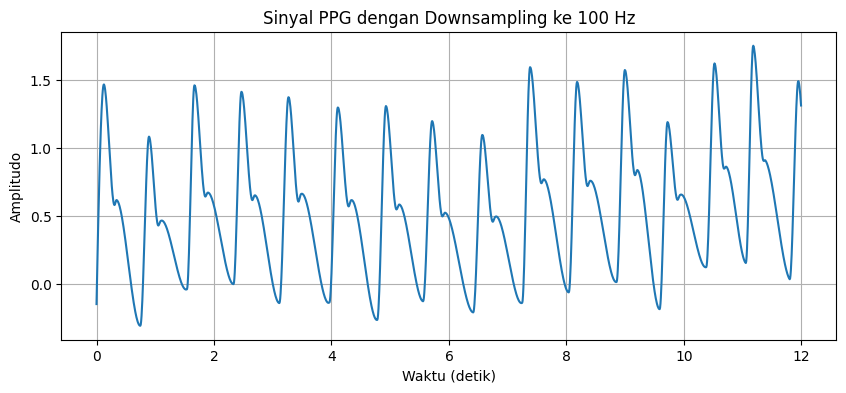

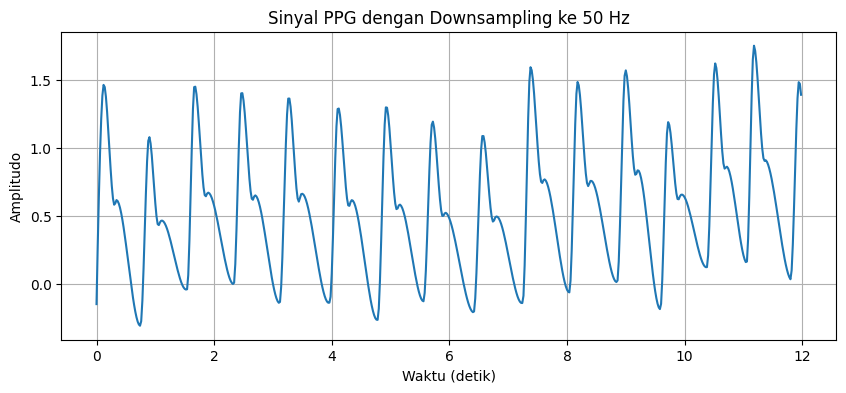

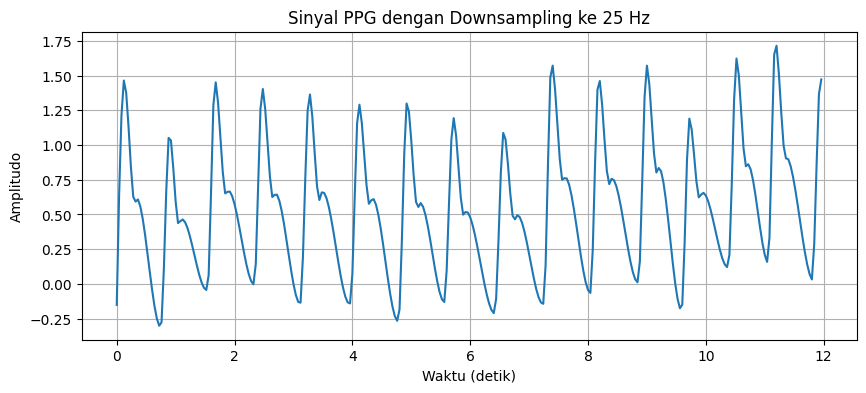

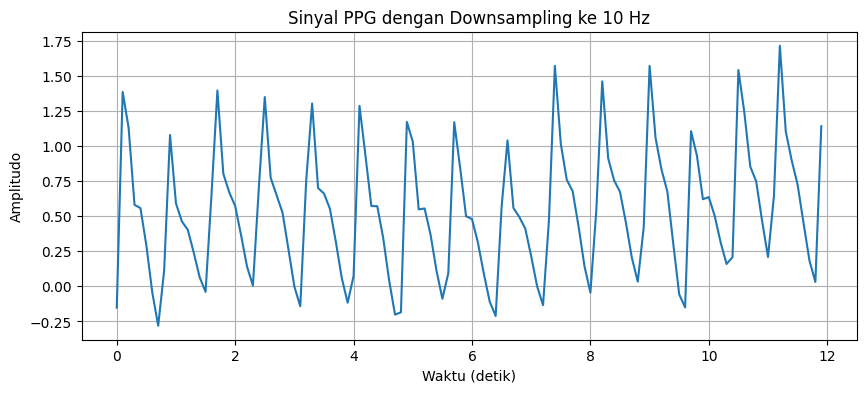

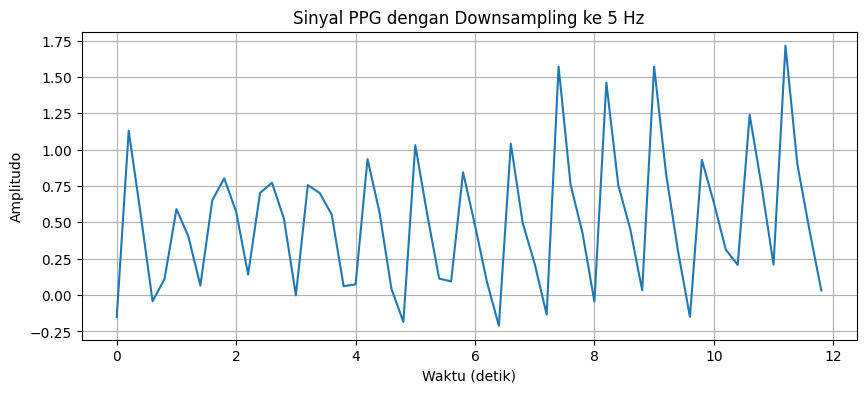

In [19]:
# Melakukan downsampling untuk setiap sampling rate
for fs_new in sampling_rates:
    # Faktor downsampling
    factor = int(fs_original / fs_new)
    
    # Downsampling sederhana dengan mengambil setiap 'factor' sampel
    downsampled = ppg_signal[::factor]
    
    # Simpan sinyal hasil downsampling
    downsampled_signals[fs_new] = downsampled
    
    # Waktu untuk plot downsampled
    t_downsampled = np.linspace(0, duration, len(downsampled), endpoint=False)
    
    # Visualisasi sinyal hasil downsampling
    plt.figure(figsize=(10, 4))
    plt.plot(t_downsampled, downsampled)
    plt.title("Sinyal PPG dengan Downsampling ke {} Hz".format(fs_new))
    plt.xlabel("Waktu (detik)")
    plt.ylabel("Amplitudo")
    plt.grid(True)
    plt.show()

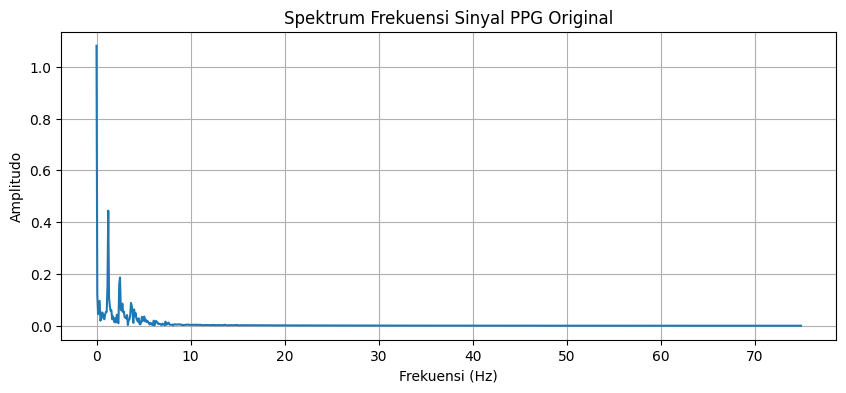

In [20]:
# Analisis Spektrum Frekuensi untuk sinyal original
N_orig = len(ppg_signal)
yf_orig = fft(ppg_signal)
xf_orig = fftfreq(N_orig, 1/fs_original)

plt.figure(figsize=(10, 4))
plt.plot(xf_orig[:N_orig//2], 2.0/N_orig * np.abs(yf_orig[:N_orig//2]))
plt.title("Spektrum Frekuensi Sinyal PPG Original")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.show()

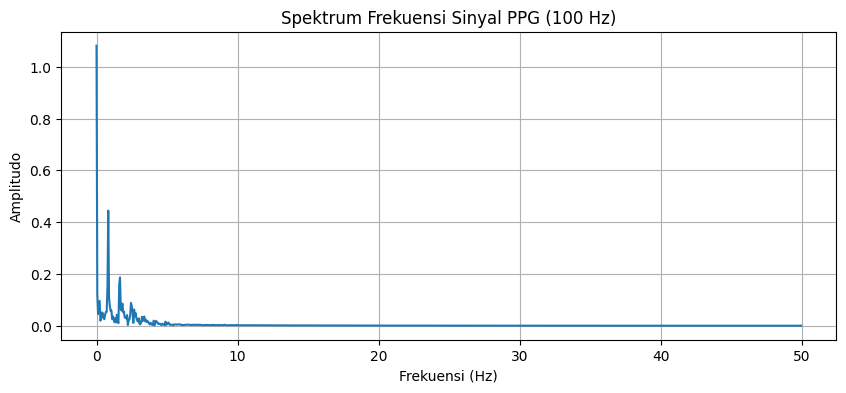

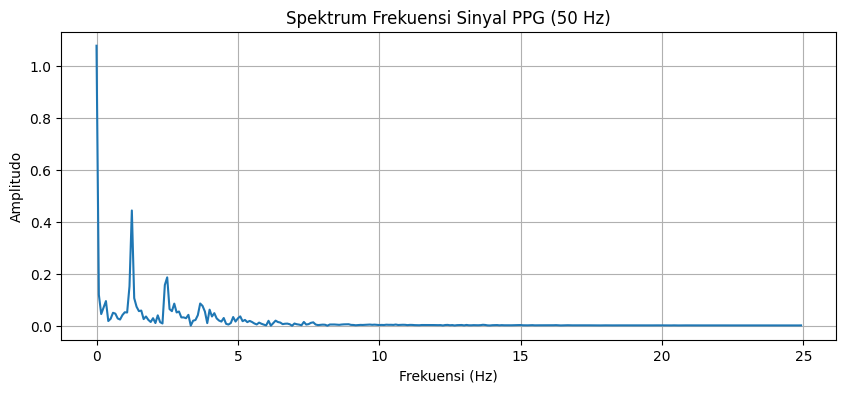

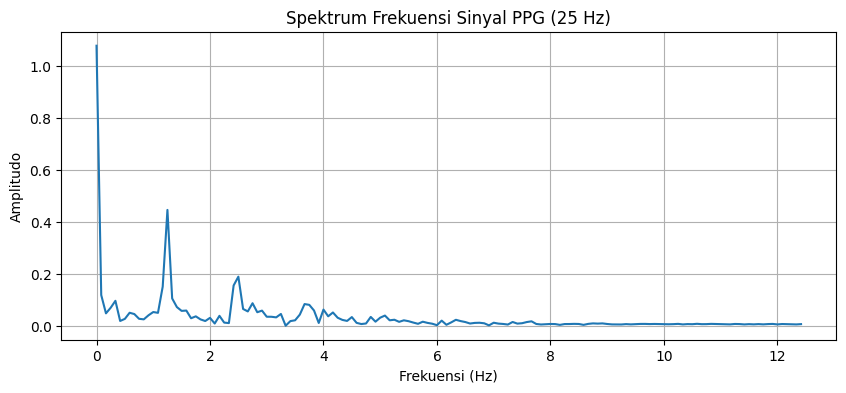

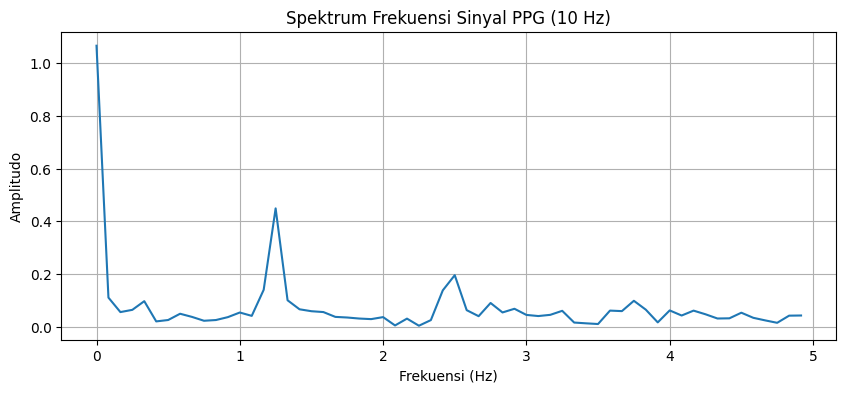

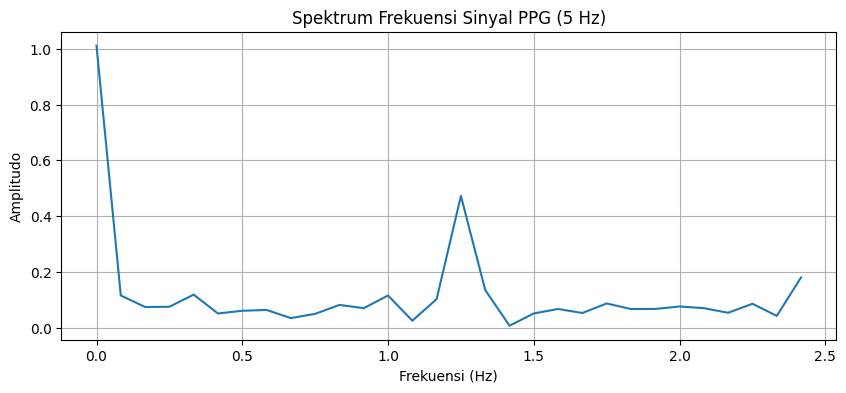

In [21]:
# Analisis Spektrum Frekuensi untuk setiap sinyal hasil downsampling
for fs_new, downsampled in downsampled_signals.items():
    N = len(downsampled)
    yf = fft(downsampled)
    xf = fftfreq(N, 1/fs_new)
    
    plt.figure(figsize=(10, 4))
    plt.plot(xf[:N//2], 2.0/N * np.abs(yf[:N//2]))
    plt.title("Spektrum Frekuensi Sinyal PPG ({} Hz)".format(fs_new))
    plt.xlabel("Frekuensi (Hz)")
    plt.ylabel("Amplitudo")
    plt.grid(True)
    plt.show()

Demonstrasi pengaruh parameter order pada filter<br> 
Kita akan membuat low-pass filter dengan berbagai order

In [22]:
# Membuat sinyal uji (gabungan frekuensi rendah dan tinggi)
t = np.linspace(0, 1, fs_original, endpoint=False)
signal_low = np.sin(2 * np.pi * 5 * t)  # Sinyal 5 Hz
signal_high = 0.5 * np.sin(2 * np.pi * 40 * t)  # Sinyal 40 Hz
combined_signal = signal_low + signal_high

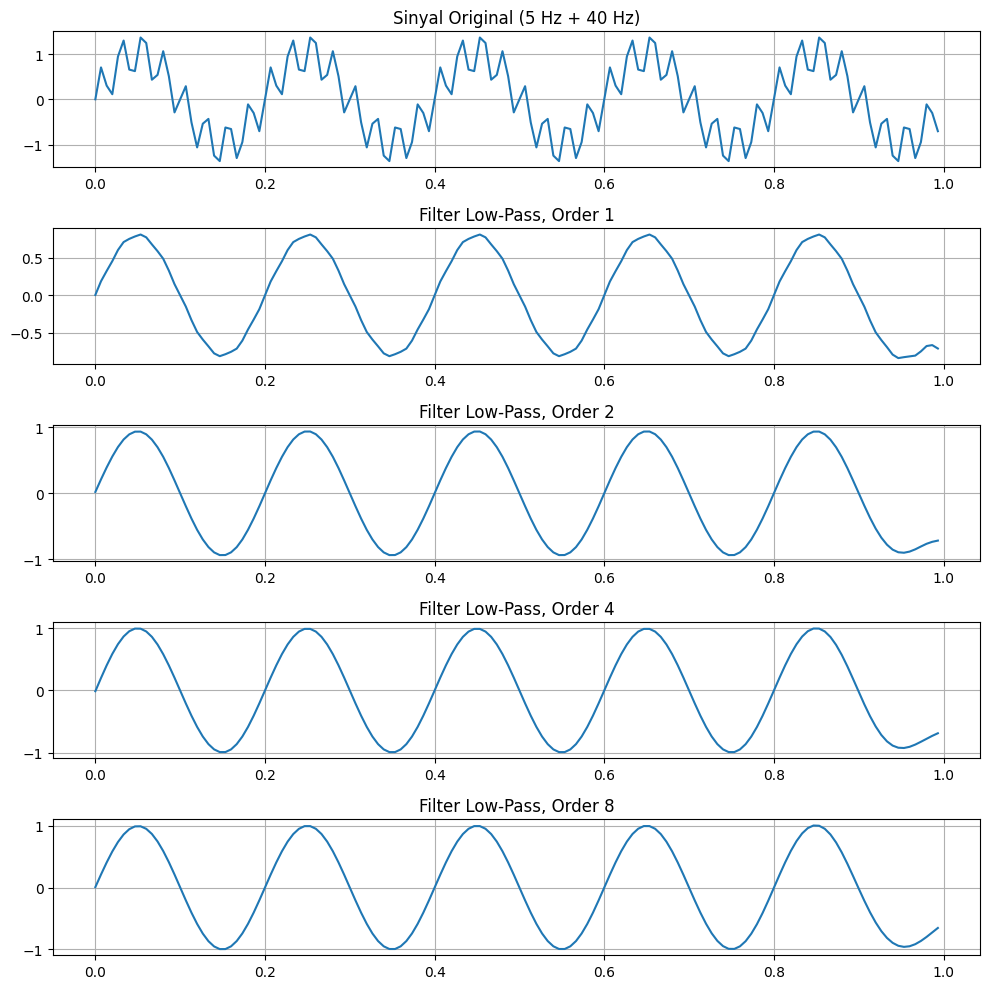

In [24]:
# Membuat filter low-pass dengan berbagai order
cutoff = 10  # Frekuensi cutoff (Hz)
orders = [1, 2, 4, 8]

fig, axs = plt.subplots(len(orders) + 1, 1, figsize=(10, 10))

axs[0].plot(t, combined_signal)
axs[0].set_title("Sinyal Original (5 Hz + 40 Hz)")
axs[0].grid(True)

for i, order in enumerate(orders):
    # Desain filter
    b, a = signal.butter(order, cutoff, fs=fs_original, btype='low')
    
    # Aplikasikan filter
    filtered = signal.filtfilt(b, a, combined_signal)
    
    # Plot
    axs[i + 1].plot(t, filtered)
    axs[i + 1].set_title("Filter Low-Pass, Order {}".format(order))
    axs[i + 1].grid(True)

plt.tight_layout()
plt.show()

Soal 2

In [26]:
# Parameter 
duration = 12  # 3 digit terakhir NIM (012)
fs_resp = 100  # Sampling rate (Hz)
noise_level = 0.12  # 2 digit terakhir NIM (12)
resp_rate = 18  # BPM (Breath Per Minute)
random_state = 40229  # Format YYMMDD tanggal lahir

In [27]:
# Simulasi sinyal respirasi
resp_signal = nk.rsp_simulate(duration=duration, 
                             sampling_rate=fs_resp,
                             respiratory_rate=resp_rate, 
                             noise=noise_level,
                             random_state=random_state)

# Waktu untuk plot
t_resp = np.linspace(0, duration, len(resp_signal), endpoint=False)

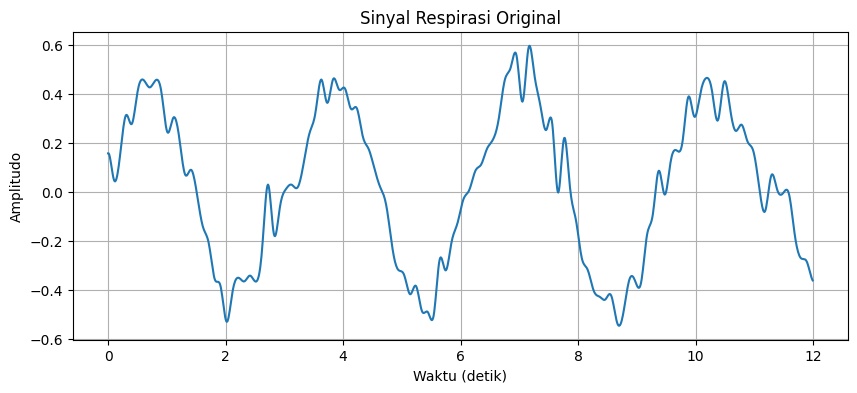

In [28]:
# Visualisasi sinyal respirasi original
plt.figure(figsize=(10, 4))
plt.plot(t_resp, resp_signal)
plt.title("Sinyal Respirasi Original")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.show()

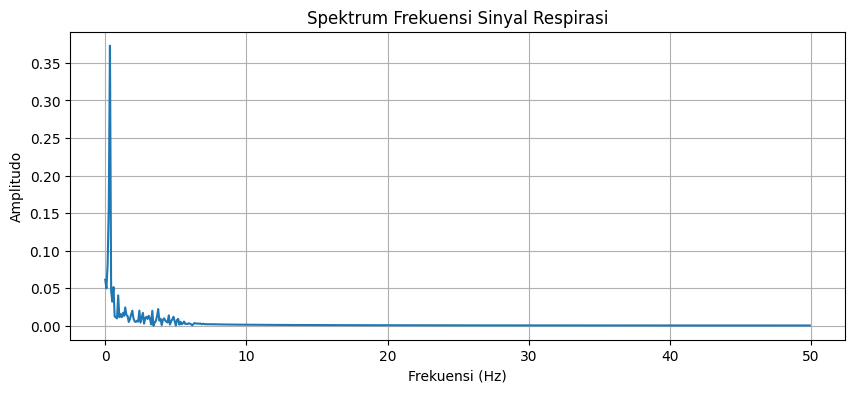

In [29]:
# Analisis spektrum frekuensi sinyal respirasi untuk menentukan cutoff yang tepat
N_resp = len(resp_signal)
yf_resp = fft(resp_signal)
xf_resp = fftfreq(N_resp, 1/fs_resp)

plt.figure(figsize=(10, 4))
plt.plot(xf_resp[:N_resp//2], 2.0/N_resp * np.abs(yf_resp[:N_resp//2]))
plt.title("Spektrum Frekuensi Sinyal Respirasi")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.show()

Desain filter band-pass<br>
Respiratory rate = 18 BPM = 18/60 = 0.3 Hz<br>
Untuk sinyal respirasi, frekuensi yang relevan biasanya antara 0.1 - 0.5 Hz<br>
Kita akan mendesain filter untuk melewatkan frekuensi ini

In [31]:
# Batas bawah dan atas frekuensi untuk band-pass filter (dalam Hz)
low_cutoff = 0.1  # 6 BPM
high_cutoff = 0.5  # 30 BPM
order = 4  # Order filter

# Desain filter band-pass
b, a = signal.butter(order, [low_cutoff, high_cutoff], fs=fs_resp, btype='band')

# Aplikasikan filter
filtered_resp = signal.filtfilt(b, a, resp_signal)

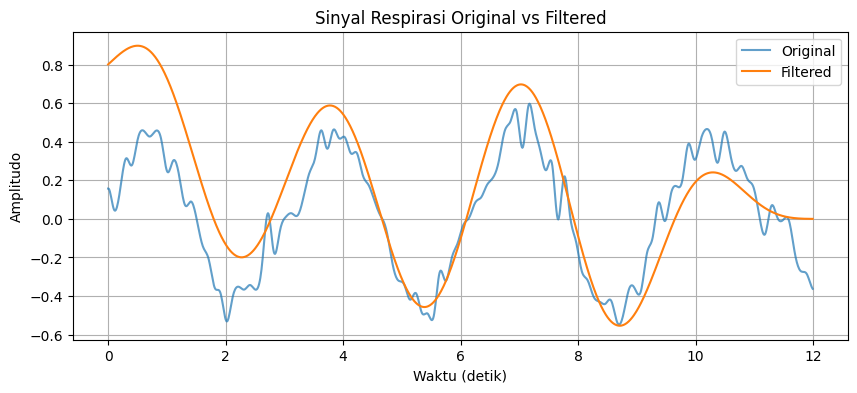

In [32]:
# Visualisasi hasil filter
plt.figure(figsize=(10, 4))
plt.plot(t_resp, resp_signal, alpha=0.7, label="Original")
plt.plot(t_resp, filtered_resp, label="Filtered")
plt.title("Sinyal Respirasi Original vs Filtered")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.legend()
plt.grid(True)
plt.show()

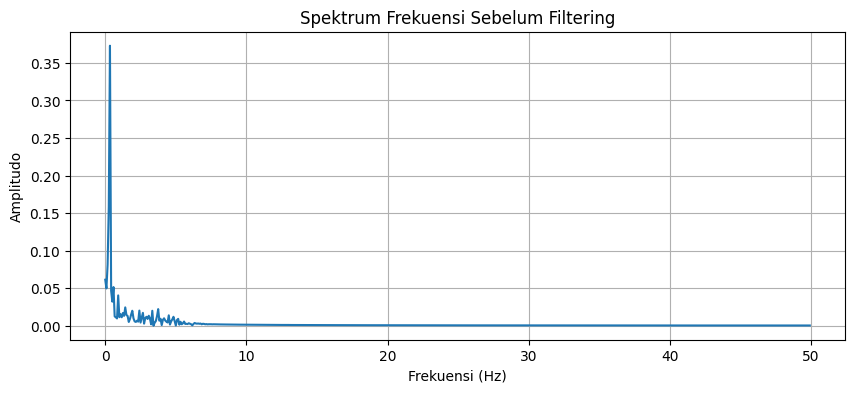

In [33]:
# Bandingkan spektrum frekuensi sebelum dan sesudah filtering
# Spektrum sebelum filtering
plt.figure(figsize=(10, 4))
plt.plot(xf_resp[:N_resp//2], 2.0/N_resp * np.abs(yf_resp[:N_resp//2]))
plt.title("Spektrum Frekuensi Sebelum Filtering")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.show()

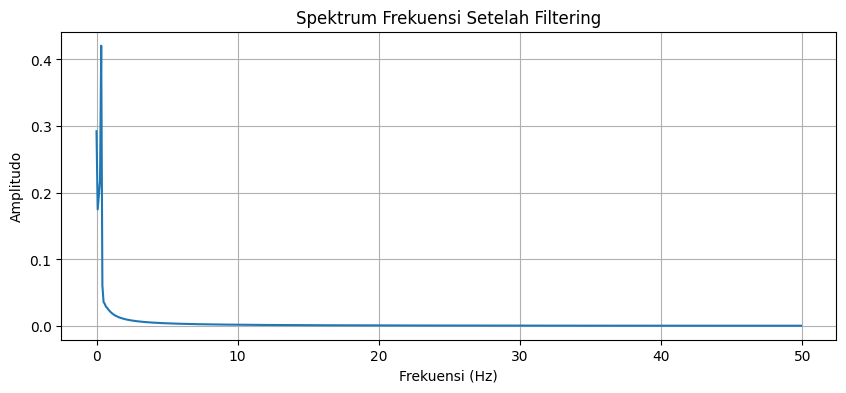

In [34]:
# Spektrum setelah filtering
N_filtered = len(filtered_resp)
yf_filtered = fft(filtered_resp)
xf_filtered = fftfreq(N_filtered, 1/fs_resp)

plt.figure(figsize=(10, 4))
plt.plot(xf_filtered[:N_filtered//2], 2.0/N_filtered * np.abs(yf_filtered[:N_filtered//2]))
plt.title("Spektrum Frekuensi Setelah Filtering")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.show()

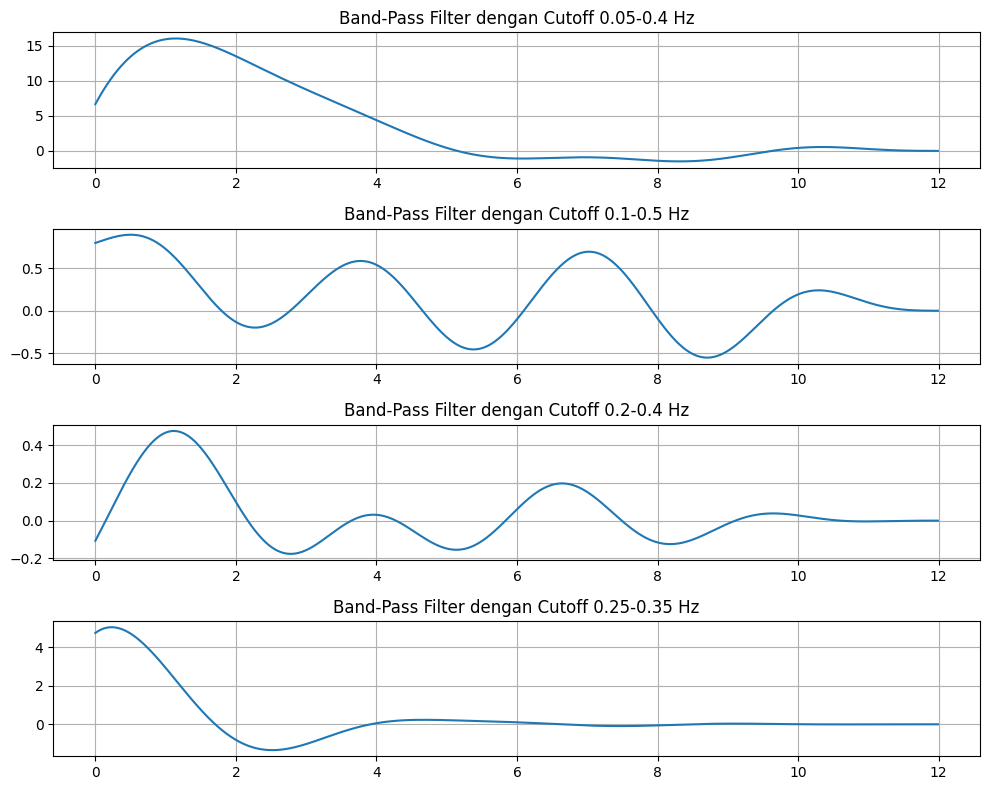

In [35]:
# Kita akan mencoba beberapa pasangan nilai cutoff dan membandingkan hasilnya
cutoff_pairs = [
    (0.05, 0.4),  # Lebih lebar
    (0.1, 0.5),   # Standard (yang sudah kita gunakan)
    (0.2, 0.4),   # Lebih sempit
    (0.25, 0.35)  # Sangat sempit
]

fig, axs = plt.subplots(len(cutoff_pairs), 1, figsize=(10, 8))

for i, (low, high) in enumerate(cutoff_pairs):
    # Desain filter
    b, a = signal.butter(order, [low, high], fs=fs_resp, btype='band')
    
    # Aplikasikan filter
    filtered = signal.filtfilt(b, a, resp_signal)
    
    # Plot
    axs[i].plot(t_resp, filtered)
    axs[i].set_title("Band-Pass Filter dengan Cutoff {}-{} Hz".format(low, high))
    axs[i].grid(True)

plt.tight_layout()
plt.show()